In [2]:
#importing tools
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
#read data from our file
df=pd.read_csv('/content/drive/MyDrive/customer seg/Bank_Personal_Loan_Modelling-1.csv')
df.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [8]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [16]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [12]:
#scalling our columns befor clustering
scaler=StandardScaler()
cols_to_scale =[ 'Income', 'CCAvg']
data_scaled = df.copy()

In [13]:
data_scaled[cols_to_scale] = scaler.fit_transform\
 (df[cols_to_scale])

In [14]:
#see our scalled columns
data_scaled[cols_to_scale].describe() 

,Income,CCAvg
count,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


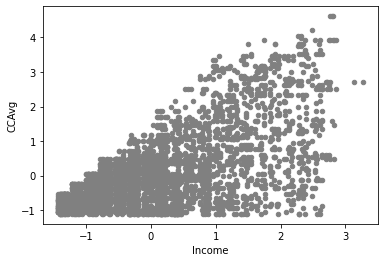

In [17]:
#just to see thje cols we will use for clustering 
data_scaled.plot.scatter(x='Income', y='CCAvg', \
 color='gray')
plt.show()

In [19]:
#use kmeans clusrering for finding the distance between them
cluster_cols = ['Income', 'CCAvg']
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.tail(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
4997,4998,63,39,-1.081363,93023,2,-0.937312,3,0,0,0,0,0,0,1
4998,4999,65,40,-0.538229,90034,3,-0.822862,2,0,0,0,0,1,0,1
4999,5000,28,4,0.200434,92612,3,-0.651186,1,0,0,0,0,1,1,2


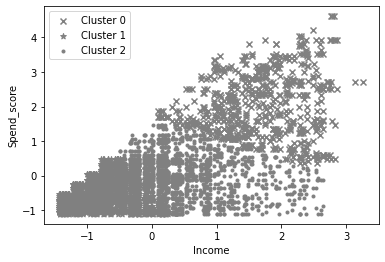

In [22]:
#visualilze
markers = ['x', '*', '.']
for clust in range(3):
 temp = data_scaled[data_scaled.Cluster == clust]
 plt.scatter(temp.Income, temp.CCAvg, \
 marker=markers[clust], \
 color = 'gray',\
 label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

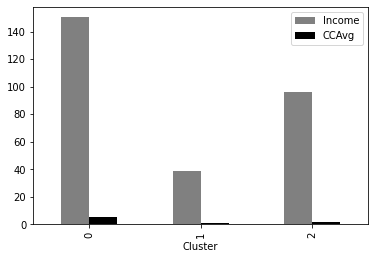

In [23]:
#visualizing our clusters
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[['Income', 'CCAvg']].mean()\
 .plot.bar(color=['gray','black'])
plt.show()

#Output


1.   cluster 0 -high income,high ccavg
2.   cluster 1 -low income, low ccavg
3.   cluster 2 -moderate income low ccavg

#Clustering for more than two features

In [4]:
#scaling our columns before clustering 
scaler=StandardScaler()
cols_to_scale =[ 'Income', 'CCAvg','Mortgage','Experience','Age']
data_scaled = df.copy()

In [5]:
data_scaled[cols_to_scale] = scaler.fit_transform\
 (df[cols_to_scale])

In [6]:
data_scaled[cols_to_scale].describe() 

,Income,CCAvg,Mortgage,Experience,Age
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.449507e-16,-6.394885e-17,-5.613288e-17,-1.179501e-16,-2.131628e-18
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00,-5.555239e-01,-2.014911e+00,-1.948906e+00
25%,-7.554825e-01,-7.084116e-01,-5.555239e-01,-8.812043e-01,-9.019702e-01
50%,-2.123482e-01,-2.506106e-01,-5.555239e-01,-9.121982e-03,-2.952359e-02
75%,5.263146e-01,3.216407e-01,4.375576e-01,8.629604e-01,8.429230e-01
max,3.263712e+00,4.613525e+00,5.688108e+00,1.996667e+00,1.889859e+00


In [7]:
#use kmeans clusrering for finding the distance between them
cluster_cols = [ 'Income', 'CCAvg','Mortgage','Experience','Age']
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.tail(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
4997,4998,1.540880,1.647835,-1.081363,93023,2,-0.937312,3,-0.555524,0,0,0,0,0,0
4998,4999,1.715370,1.735043,-0.538229,90034,3,-0.822862,2,-0.555524,0,0,0,1,0,0
4999,5000,-1.512683,-1.404454,0.200434,92612,3,-0.651186,1,-0.555524,0,0,0,1,1,2


In [8]:
# perform Principal Component Analysis
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

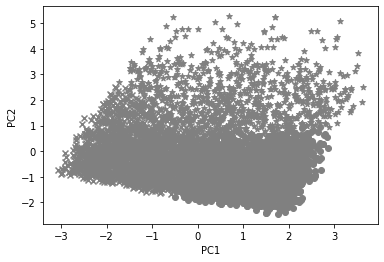

In [9]:
#scatter plot for our 2 PCAs
markers = ['x', '*', 'o','|']
for clust in range(4):
 temp = data_scaled[data_scaled.Cluster == clust]
 plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
 label="Cluster "+str(clust), \
 color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

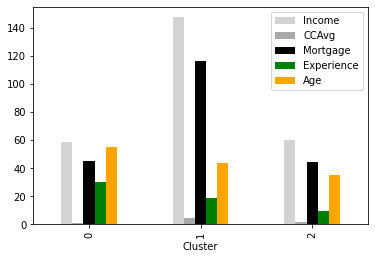

In [11]:
#visualizing our clusters
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[[ 'Income', 'CCAvg','Mortgage','Experience','Age']
                          ].mean() \
 .plot.bar(color=['lightgray', 'darkgray', 'black','green','orange'])
plt.show()

#Output


1.   cluster 0 -- low income, very low ccavg, low mortgage, low experiance, high age
2.   cluster 1 --high income,low ccavg, high morgage, low experiance,low moderate age
3.   cluster 2 --low income, low ccavg, low mortgage, low experiance, low age

